In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Checking the target classes

In [6]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

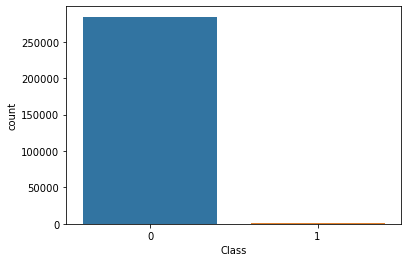

In [12]:
sns.countplot(x=df['Class'], data=df)

The data is totally unbalanced

### Sampling data

In [14]:
legal = df[df['Class'] ==0]
fraud = df[df['Class'] == 1]

In [16]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [17]:
sample_legal = legal.sample(492)

In [18]:
df2 = pd.concat([sample_legal, fraud], axis=0)
df2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
204321,135223.0,1.781879,-1.392290,-0.716348,-1.781689,-1.466456,-1.283239,-0.564177,-0.099947,2.985760,...,-0.000876,-0.126064,0.172132,-0.012721,-0.355089,-1.058934,0.048055,-0.008686,147.54,0
164480,116747.0,2.053118,0.133098,-1.765097,0.566274,0.047303,-1.580677,0.187834,-0.319220,0.795872,...,0.175132,0.613954,-0.005143,-0.064128,0.204992,-0.099420,-0.010316,-0.031565,4.35,0
181236,124885.0,-0.667815,1.262796,-1.355130,-1.219679,0.851450,-1.192478,1.056226,0.279541,-0.344854,...,0.283302,0.784482,-0.147147,0.759430,-0.321404,0.045587,0.362293,0.247995,7.70,0
30085,35767.0,1.081199,0.292894,0.156092,1.077994,0.132842,-0.251443,0.330494,-0.007128,-0.562073,...,-0.283725,-0.934003,0.125646,-0.029059,0.287596,-0.718398,0.008611,0.018073,45.20,0
117452,74681.0,-1.677865,-0.791908,2.485761,3.495320,1.580880,-0.550004,-0.755704,0.069076,-0.610543,...,-0.220378,-0.473031,0.178161,0.386424,-0.711649,-0.113925,-0.126301,0.139544,5.30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [19]:
df2['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

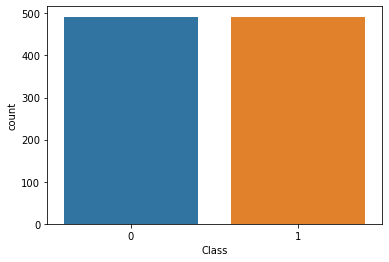

In [20]:
sns.countplot(x=df2['Class'])

Now the data are balanced

In [22]:
df2.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95382.776423,-0.096349,-0.021310,0.026851,-0.154645,0.088315,0.011939,0.033378,0.030496,0.004027,...,-0.006554,0.006344,0.019805,-0.015669,0.005119,0.009091,0.006565,-0.016561,-0.001386,81.289126
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Split the data into Training and Testing Data

In [23]:
x = df2.drop('Class', axis=1)
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
204321,135223.0,1.781879,-1.392290,-0.716348,-1.781689,-1.466456,-1.283239,-0.564177,-0.099947,2.985760,...,-0.040001,-0.000876,-0.126064,0.172132,-0.012721,-0.355089,-1.058934,0.048055,-0.008686,147.54
164480,116747.0,2.053118,0.133098,-1.765097,0.566274,0.047303,-1.580677,0.187834,-0.319220,0.795872,...,-0.290607,0.175132,0.613954,-0.005143,-0.064128,0.204992,-0.099420,-0.010316,-0.031565,4.35
181236,124885.0,-0.667815,1.262796,-1.355130,-1.219679,0.851450,-1.192478,1.056226,0.279541,-0.344854,...,-0.147237,0.283302,0.784482,-0.147147,0.759430,-0.321404,0.045587,0.362293,0.247995,7.70
30085,35767.0,1.081199,0.292894,0.156092,1.077994,0.132842,-0.251443,0.330494,-0.007128,-0.562073,...,-0.073980,-0.283725,-0.934003,0.125646,-0.029059,0.287596,-0.718398,0.008611,0.018073,45.20
117452,74681.0,-1.677865,-0.791908,2.485761,3.495320,1.580880,-0.550004,-0.755704,0.069076,-0.610543,...,0.193021,-0.220378,-0.473031,0.178161,0.386424,-0.711649,-0.113925,-0.126301,0.139544,5.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [25]:
y = df2['Class']
y

204321    0
164480    0
181236    0
30085     0
117452    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

### Modeling

In [54]:
def cvs (model, model_name):
    model = cross_val_score(model ,x ,y ,cv=10)
    score = np.average(model)
    print(f"{model_name} score: {score * 100}%")
    

In [74]:
def train(model, model_name):
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print(f"{model_name} model score on Training data: {train_score * 100}%\n{model_name} model score on Testing data: {test_score}%")

In [75]:
rf = RandomForestClassifier(n_estimators=80, random_state=10)
cvs(rf, "Random Forest")
train(rf, "Random Forest")

Random Forest score: 94.20428777571634%
Random Forest model score on Training data: 100.0%
Random Forest model score on Testing data: 0.9471544715447154%


In [76]:
lg = LogisticRegression()
cvs(lg, "Logistic Regression")
train(lg, "Logistic Regression")

C:\Users\MOH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression score: 92.87466501752218%
Logistic Regression model score on Training data: 94.3089430894309%
Logistic Regression model score on Testing data: 0.9552845528455285%


In [77]:
knn_model = KNeighborsClassifier(n_neighbors=3)
cvs(knn_model, "KNN")
train(knn_model, "KNN")

KNN score: 37.922077922077925%
KNN model score on Training data: 82.11382113821138%
KNN model score on Testing data: 0.6178861788617886%


In [79]:
nb = GaussianNB()
cvs(nb , "naive bayes")
train(nb , "naive bayes")

naive bayes score: 85.76066790352505%
naive bayes model score on Training data: 84.95934959349594%
naive bayes model score on Testing data: 0.8739837398373984%


In [85]:
dt = DecisionTreeClassifier()
cvs(dt, "Decision Tree")
train(dt, "Decision Tree")

Decision Tree score: 88.20243248814677%
Decision Tree model score on Training data: 100.0%
Decision Tree model score on Testing data: 0.9471544715447154%


### Save the model

In [87]:
def savemodel(model, modelname):
    import joblib
    joblib.dump(model, modelname)

In [89]:
savemodel(rf, "Random Forest model")